In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
# Importation du dataset avec pandas

df = pd.read_csv('dataset.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
nul = df.isna()
nul.sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Supprimer les doublons qui sont dans le 581

df.drop_duplicates(inplace=True)

In [8]:
df.reset_index(inplace=True)

In [9]:
df.drop(columns='index')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [10]:
df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1332,1333,50,male,30.970,3,no,northwest,10600.54830
1333,1334,18,female,31.920,0,no,northeast,2205.98080
1334,1335,18,female,36.850,0,no,southeast,1629.83350
1335,1336,21,female,25.800,0,no,southwest,2007.94500


/tmp/ipykernel_10600/3312828911.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['BMI_category'], y=df['charges'], palette='Blues_d')


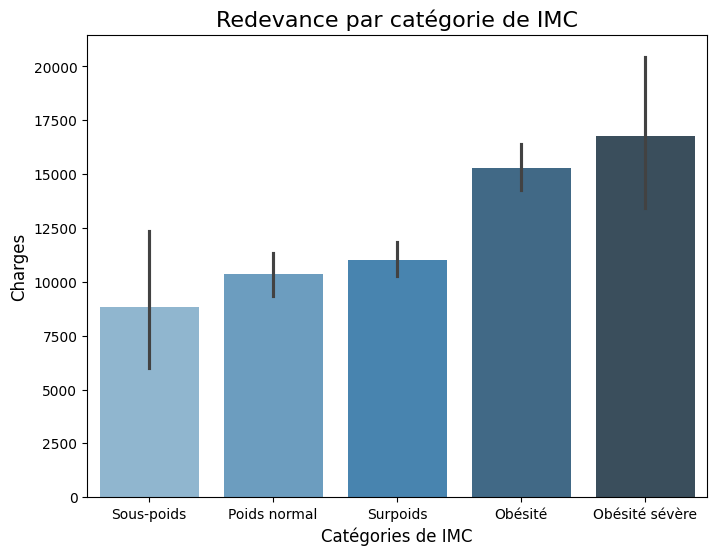

In [11]:
# Définir les tranches de BMI
bins = [0, 18.5, 24.9, 29.9, 40, 100]  # Tranches de BMI
labels = ['Sous-poids', 'Poids normal', 'Surpoids', 'Obésité', 'Obésité sévère']

# Ajouter une nouvelle colonne dans le DataFrame pour les tranches de BMI
df['BMI_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)


# Créer un graphique en barres avec les tranches de BMI sur l'axe x
plt.figure(figsize=(8, 6))
sns.barplot(x=df['BMI_category'], y=df['charges'], palette='Blues_d')

# Ajouter les labels et le titre
plt.title('Redevance par catégorie de IMC', fontsize=16)
plt.xlabel('Catégories de IMC', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Afficher le graphique
plt.show()


In [12]:

df

,index,age,sex,bmi,children,smoker,region,charges,BMI_category
0,0,19,female,27.900,0,yes,southwest,16884.92400,Surpoids
1,1,18,male,33.770,1,no,southeast,1725.55230,Obésité
2,2,28,male,33.000,3,no,southeast,4449.46200,Obésité
3,3,33,male,22.705,0,no,northwest,21984.47061,Poids normal
4,4,32,male,28.880,0,no,northwest,3866.85520,Surpoids
...,...,...,...,...,...,...,...,...,...
1332,1333,50,male,30.970,3,no,northwest,10600.54830,Obésité
1333,1334,18,female,31.920,0,no,northeast,2205.98080,Obésité
1334,1335,18,female,36.850,0,no,southeast,1629.83350,Obésité
1335,1336,21,female,25.800,0,no,southwest,2007.94500,Surpoids


Sur ce graphique on peut constater que plus l'IMC est élévé plus les clients ont une redevance élévée avec de gros écarts de min-max avec 

/tmp/ipykernel_10600/3336949216.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['age_categories'], y=df['charges'], palette='Blues_d')


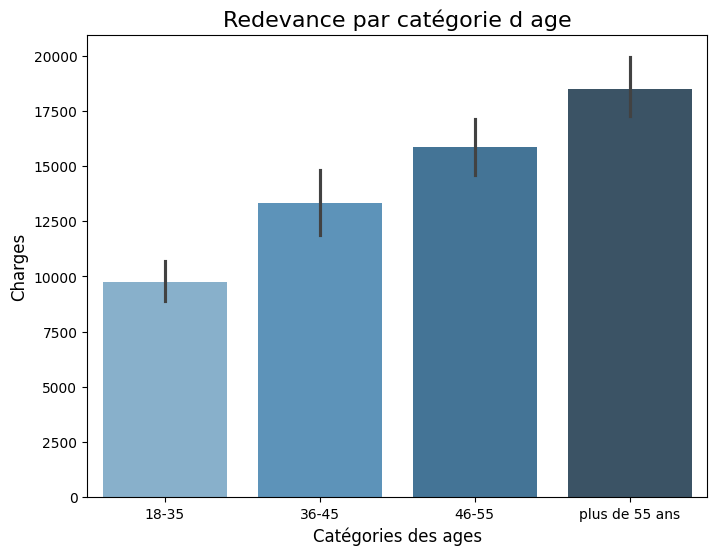

In [13]:
# Définir les tranches d'ages
bins = [18, 36, 45, 55, 65]  # Tranches de BMI
labels = ['18-35', '36-45', '46-55', 'plus de 55 ans']

# Ajouter une nouvelle colonne dans le DataFrame pour les tranches de BMI
df['age_categories'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Créer un graphique en barres avec les tranches des ages sur l'axe x
plt.figure(figsize=(8, 6))
sns.barplot(x=df['age_categories'], y=df['charges'], palette='Blues_d')

# Ajouter les labels et le titre
plt.title('Redevance par catégorie d age', fontsize=16)
plt.xlabel('Catégories des ages', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Afficher le graphique
plt.show()

Intuitivement avec ce graphique on peut conclure qu'en plus de l'IMC l'age sera une variable explicative

/tmp/ipykernel_10600/3493434044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['sex'], y=df['charges'], palette='Blues_d')


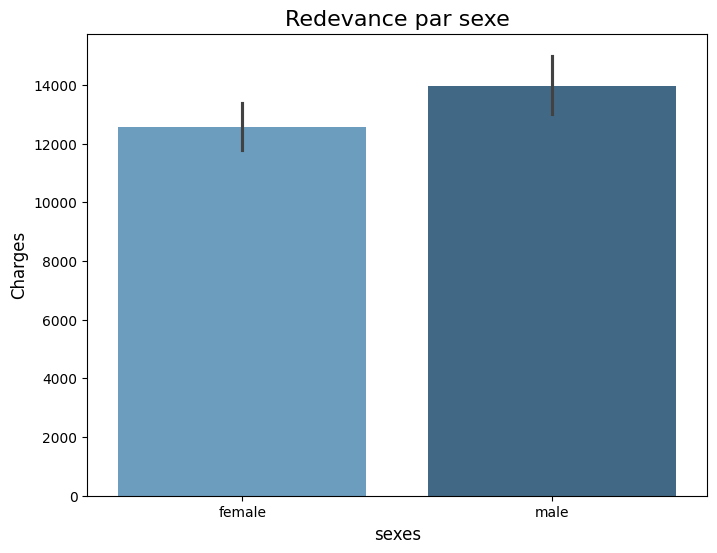

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['sex'], y=df['charges'], palette='Blues_d')

# Ajouter les labels et le titre
plt.title('Redevance par sexe', fontsize=16)
plt.xlabel('sexes', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Afficher le graphique
plt.show()

Les femmes payent moins chers que les hommes, cela doit être peu significatif

/tmp/ipykernel_10600/3868014665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['smoker'], y=df['charges'], palette='Blues_d')


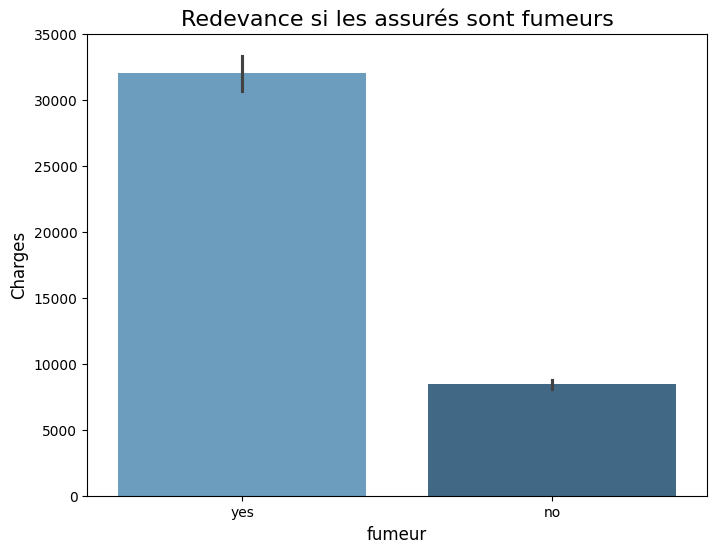

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['smoker'], y=df['charges'], palette='Blues_d')

# Ajouter les labels et le titre
plt.title('Redevance si les assurés sont fumeurs', fontsize=16)
plt.xlabel('fumeur', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Afficher le graphique
plt.show()

/tmp/ipykernel_10600/3684351634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['smoker'], y=df['charges'], palette='Blues_d')


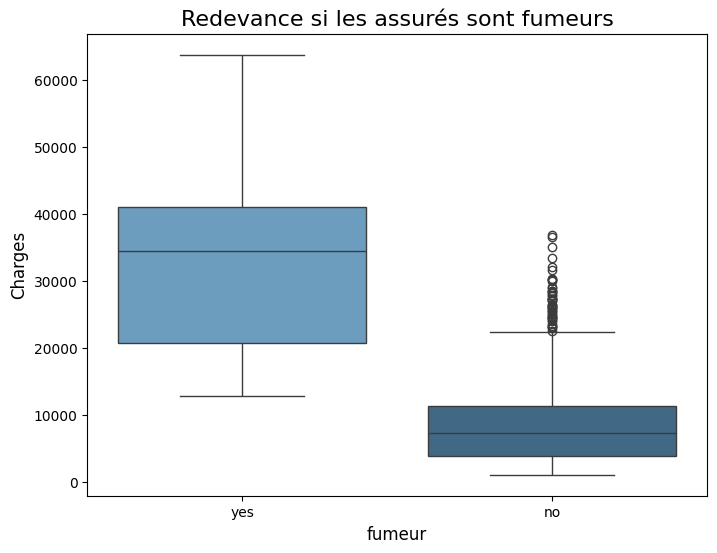

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['smoker'], y=df['charges'], palette='Blues_d')

# Ajouter les labels et le titre
plt.title('Redevance si les assurés sont fumeurs', fontsize=16)
plt.xlabel('fumeur', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Afficher le graphique
plt.show()

si les clients sont fumeurs la redevance est 3 fois plus elevée

In [17]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

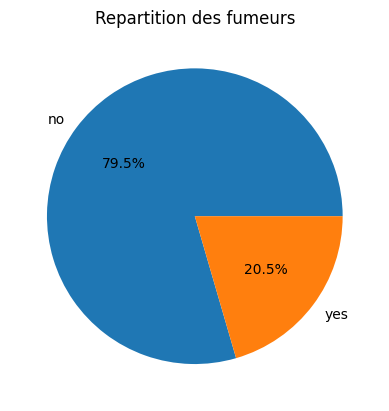

In [18]:
# Répartition des fumeurs dans le dataset

y = df['smoker'].value_counts()

plt.pie(y, labels=y.index, autopct='%1.1f%%')
plt.title('Repartition des fumeurs')
plt.show() 

<Axes: >

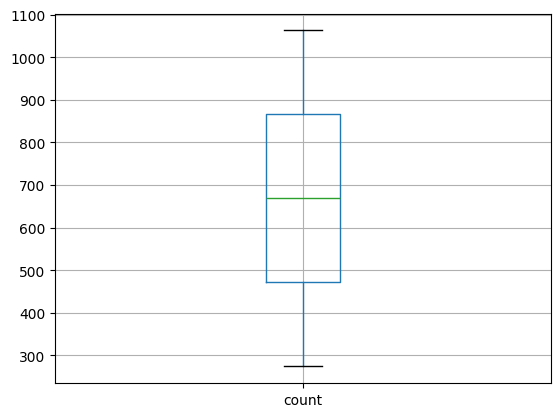

In [19]:
pd.DataFrame(df['smoker'].value_counts()).boxplot()

In [20]:
df_sans_fumeur = df[df['smoker'] == 'no']

df_sans_fumeur

,index,age,sex,bmi,children,smoker,region,charges,BMI_category,age_categories
1,1,18,male,33.770,1,no,southeast,1725.55230,Obésité,18-35
2,2,28,male,33.000,3,no,southeast,4449.46200,Obésité,18-35
3,3,33,male,22.705,0,no,northwest,21984.47061,Poids normal,18-35
4,4,32,male,28.880,0,no,northwest,3866.85520,Surpoids,18-35
5,5,31,female,25.740,0,no,southeast,3756.62160,Surpoids,18-35
...,...,...,...,...,...,...,...,...,...,...
1331,1332,52,female,44.700,3,no,southwest,11411.68500,Obésité sévère,46-55
1332,1333,50,male,30.970,3,no,northwest,10600.54830,Obésité,46-55
1333,1334,18,female,31.920,0,no,northeast,2205.98080,Obésité,18-35
1334,1335,18,female,36.850,0,no,southeast,1629.83350,Obésité,18-35


In [21]:
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)
IQR = q3-q1
borne_supp = q3+(1.5*IQR)

borne_supp

np.float64(34524.777625)

In [22]:
df_aberrant = df[df['charges']> borne_supp]

In [23]:
df_aberrant['smoker'].value_counts()

# on constate qu'il y a 136 fumeurs sur les 139 valeurs aberrantes du dataset

smoker
yes    136
no       3
Name: count, dtype: int64

In [24]:
df_aberrant.describe()

,index,age,bmi,children,charges
count,139.000000,139.000000,139.000000,139.000000,139.000000
mean,655.316547,41.079137,35.564604,1.187050,42103.947206
std,400.386155,13.801420,4.434917,1.126546,5582.168107
min,14.000000,18.000000,22.895000,0.000000,34617.840650
25%,290.000000,30.000000,32.667500,0.000000,37786.149950
50%,668.000000,43.000000,35.200000,1.000000,40974.164900
75%,1026.500000,52.500000,37.660000,2.000000,45786.706425
max,1323.000000,64.000000,52.580000,4.000000,63770.428010


In [25]:
df_sans_aberrants = df[df['charges']< borne_supp]
df_sans_aberrants.describe()

,index,age,bmi,children,charges
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,670.102671,39.006678,30.094787,1.085142,9934.671758
std,385.031707,14.062040,6.013044,1.214407,7240.216987
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,343.250000,26.000000,25.800000,0.000000,4418.591062
50%,669.500000,39.000000,29.735000,1.000000,8411.754950
75%,999.750000,51.000000,33.820000,2.000000,12955.356300
max,1337.000000,64.000000,53.130000,5.000000,34472.841000


/tmp/ipykernel_10600/4216878230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['children'], y=df['charges'], palette='Blues_d')


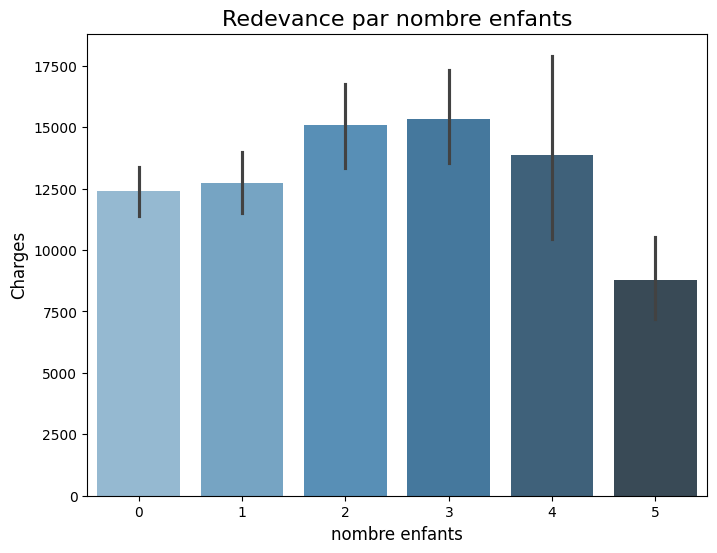

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['children'], y=df['charges'], palette='Blues_d')

# Ajouter les labels et le titre
plt.title('Redevance par nombre enfants', fontsize=16)
plt.xlabel('nombre enfants', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Afficher le graphique
plt.show()

/tmp/ipykernel_10600/643234131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['children'], y=df['charges'], palette='Blues_d')


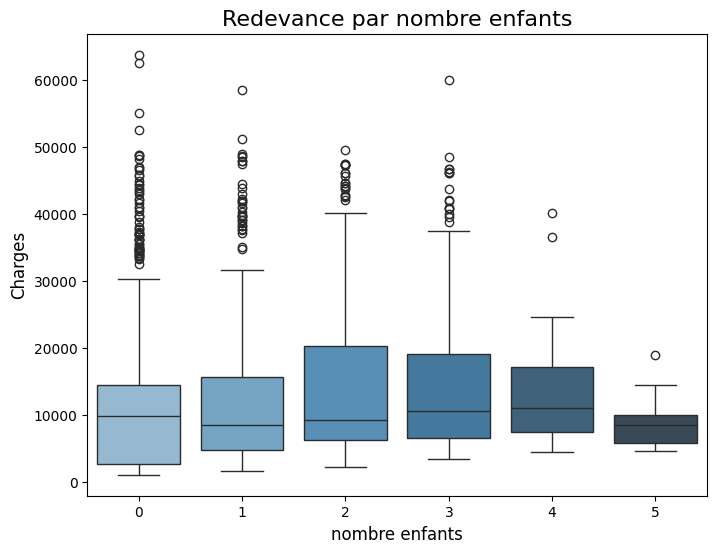

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['children'], y=df['charges'], palette='Blues_d')

# Ajouter les labels et le titre
plt.title('Redevance par nombre enfants', fontsize=16)
plt.xlabel('nombre enfants', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Afficher le graphique
plt.show()

on note que les clients avec plus de 3 enfants, la prime et moins elevées que les autres ce qui est surprenant, de plus leur nombres est moins élevé par rapport aux personnes avec moins de 4 enfants. il y a plus de dispersions chez les personnes sans enfant

In [28]:
df_moins_5_enfants = df[df['children'] == 3 ]
df_moins_5_enfants.sort_values(by= 'charges')

,index,age,sex,bmi,children,smoker,region,charges,BMI_category,age_categories
879,880,22,male,34.800,3,no,southwest,3443.06400,Obésité,18-35
369,369,18,male,30.400,3,no,northeast,3481.86800,Obésité,18-35
1091,1092,23,male,32.700,3,no,southwest,3591.48000,Obésité,18-35
816,817,23,male,37.100,3,no,southwest,3597.59600,Obésité,18-35
585,586,21,male,20.235,3,no,northeast,3861.20965,Poids normal,18-35
...,...,...,...,...,...,...,...,...,...,...
882,883,51,female,37.050,3,yes,northeast,46255.11250,Obésité,46-55
1121,1122,53,female,36.860,3,yes,northwest,46661.44240,Obésité,46-55
1300,1301,62,male,30.875,3,yes,northwest,46718.16325,Obésité,plus de 55 ans
281,281,54,male,40.565,3,yes,northeast,48549.17835,Obésité sévère,46-55


In [29]:
df.sort_values(by = 'charges').tail()

,index,age,sex,bmi,children,smoker,region,charges,BMI_category,age_categories
818,819,33,female,35.530,0,yes,northwest,55135.40209,Obésité,18-35
577,577,31,female,38.095,1,yes,northeast,58571.07448,Obésité,18-35
1229,1230,52,male,34.485,3,yes,northwest,60021.39897,Obésité,46-55
1299,1300,45,male,30.360,0,yes,southeast,62592.87309,Obésité,46-55
543,543,54,female,47.410,0,yes,southeast,63770.42801,Obésité sévère,46-55


In [30]:
df.sort_values(by='charges').tail()

,index,age,sex,bmi,children,smoker,region,charges,BMI_category,age_categories
818,819,33,female,35.530,0,yes,northwest,55135.40209,Obésité,18-35
577,577,31,female,38.095,1,yes,northeast,58571.07448,Obésité,18-35
1229,1230,52,male,34.485,3,yes,northwest,60021.39897,Obésité,46-55
1299,1300,45,male,30.360,0,yes,southeast,62592.87309,Obésité,46-55
543,543,54,female,47.410,0,yes,southeast,63770.42801,Obésité sévère,46-55


In [31]:
#Voir si les femmes obeses sont plus disciminées que les hommes obèses

df_obesite = df[(df['BMI_category']== 'Obésité')|(df['BMI_category']== 'Obésité sévère')]
df_obesite

,index,age,sex,bmi,children,smoker,region,charges,BMI_category,age_categories
1,1,18,male,33.77,1,no,southeast,1725.55230,Obésité,18-35
2,2,28,male,33.00,3,no,southeast,4449.46200,Obésité,18-35
6,6,46,female,33.44,1,no,southeast,8240.58960,Obésité,46-55
12,12,23,male,34.40,0,no,southwest,1826.84300,Obésité,18-35
13,13,56,female,39.82,0,no,southeast,11090.71780,Obésité,plus de 55 ans
...,...,...,...,...,...,...,...,...,...,...
1330,1331,23,female,33.40,0,no,southwest,10795.93733,Obésité,18-35
1331,1332,52,female,44.70,3,no,southwest,11411.68500,Obésité sévère,46-55
1332,1333,50,male,30.97,3,no,northwest,10600.54830,Obésité,46-55
1333,1334,18,female,31.92,0,no,northeast,2205.98080,Obésité,18-35


/tmp/ipykernel_10600/435497350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_obesite['sex'], y=df_obesite['charges'], palette='Blues_d')


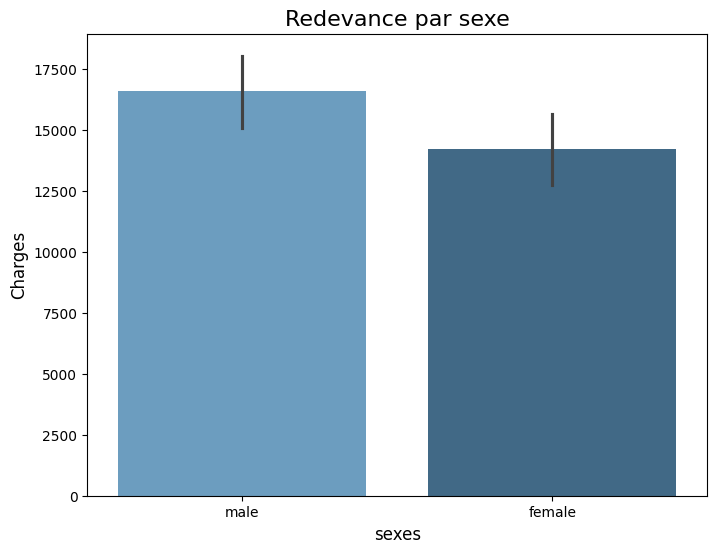

In [32]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df_obesite['sex'], y=df_obesite['charges'], palette='Blues_d')

# Ajouter les labels et le titre
plt.title('Redevance par sexe', fontsize=16)
plt.xlabel('sexes', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Afficher le graphique
plt.show()

/tmp/ipykernel_10600/4111591751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_obesite['sex'], y=df_obesite['charges'], palette='Blues_d')


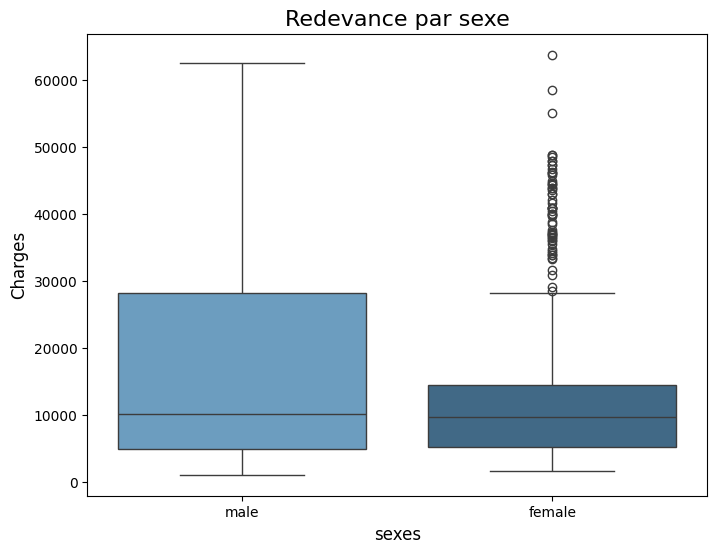

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_obesite['sex'], y=df_obesite['charges'], palette='Blues_d')

# Ajouter les labels et le titre
plt.title('Redevance par sexe', fontsize=16)
plt.xlabel('sexes', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Afficher le graphique
plt.show()

quand les personnes sont en obésité la différence de redevance entre les hommes et les femmes, la différence entre les deux sexes se creuse légérement en faveur des femmes

In [34]:
df['BMI_category'].value_counts()

BMI_category
Obésité           627
Surpoids          377
Poids normal      222
Obésité sévère     91
Sous-poids         20
Name: count, dtype: int64

In [35]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

y a t il des discriminations par région

/tmp/ipykernel_10600/1809750766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_obesite['region'], y=df_obesite['charges'], palette='Blues_d')


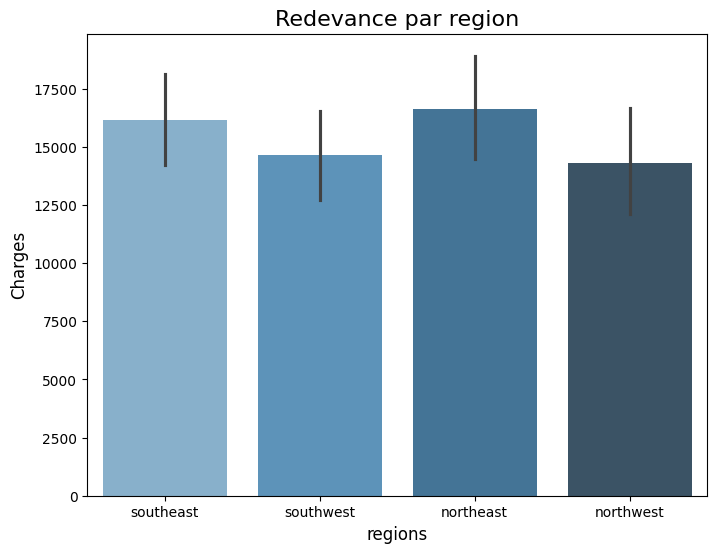

In [36]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df_obesite['region'], y=df_obesite['charges'], palette='Blues_d')

# Ajouter les labels et le titre
plt.title('Redevance par region', fontsize=16)
plt.xlabel('regions', fontsize=12)
plt.ylabel('Charges', fontsize=12)

# Afficher le graphique
plt.show()

avec l'analyse et les tableaux on constate que les critères qui peuvent expliquer les différences de prix sont :


- les fumeurs, payent en moyenne 3 fois plus de redevance que les non-fumeurs
- Ensuite ce qui est à peu près égaux ce sont les critères vis à vis de l'age et du poids
- Le sexe joue une différence assez minime et pareil pour la région quuand on est de l'ouest on paye moins que l'est

maintenant à voir dans le cas de la modélisation

<Axes: xlabel='bmi', ylabel='charges'>

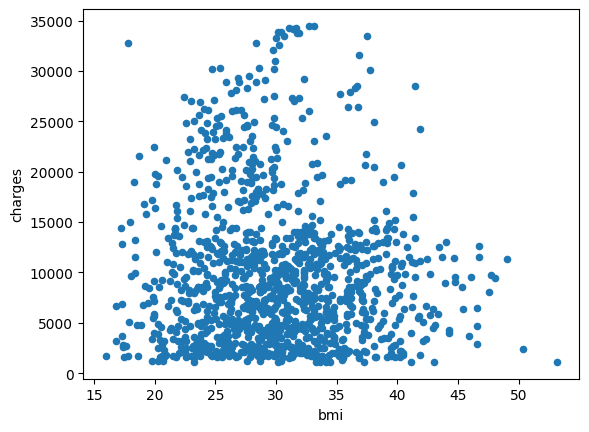

In [37]:
df_sans_aberrants.plot(x = 'bmi', y ='charges', kind = 'scatter', legend='BMI_category')

In [38]:
df_sans_aberrants.sort_values(by= 'charges').head(25)

,index,age,sex,bmi,children,smoker,region,charges,BMI_category,age_categories
939,940,18,male,23.21,0,no,southeast,1121.8739,Poids normal,18-35
807,808,18,male,30.14,0,no,southeast,1131.5066,Obésité,18-35
1243,1244,18,male,33.33,0,no,southeast,1135.9407,Obésité,18-35
662,663,18,male,33.66,0,no,southeast,1136.3994,Obésité,18-35
22,22,18,male,34.10,0,no,southeast,1137.0110,Obésité,18-35
194,194,18,male,34.43,0,no,southeast,1137.4697,Obésité,18-35
865,866,18,male,37.29,0,no,southeast,1141.4451,Obésité,18-35
780,781,18,male,41.14,0,no,southeast,1146.7966,Obésité sévère,18-35
442,442,18,male,43.01,0,no,southeast,1149.3959,Obésité sévère,18-35
1316,1317,18,male,53.13,0,no,southeast,1163.4627,Obésité sévère,18-35


In [39]:
df.value_counts('sex')

sex
male      675
female    662
Name: count, dtype: int64

In [40]:
df['charges'].mean()

np.float64(13279.121486655948)

In [41]:
np.pow(2,2)

np.int64(4)

In [42]:
#création de la fonction de corrélation de pearson

def correlation_pearson(x,y):
    sum_r_numerateur = 0
    sum_x_denominateur = 0
    sum_y_denominateur = 0
    y_moy = y.mean()
    x_moy = x.mean()

    for i in range(len(x)):
        num_calc = (x[i]-x_moy)*(y[i] - y_moy)
        sum_r_numerateur += num_calc
        denom_x_calc = pow(x[i]-x_moy, 2)
        sum_x_denominateur += denom_x_calc
        denom_y_calc = pow(y[i] - y_moy, 2)
        sum_y_denominateur += denom_y_calc


    return sum_r_numerateur / (np.sqrt(sum_x_denominateur) * np.sqrt(sum_y_denominateur))
        




In [43]:
corr_bmi = correlation_pearson(df['bmi'], df['charges'])

corr_bmi

np.float64(0.19840083122624938)

In [44]:
corr_age = correlation_pearson(df['age'], df['charges'])
corr_age

np.float64(0.29830821250978584)

In [45]:
corr_chil = correlation_pearson(df['children'], df['charges'])
corr_chil

np.float64(0.06738935083963249)

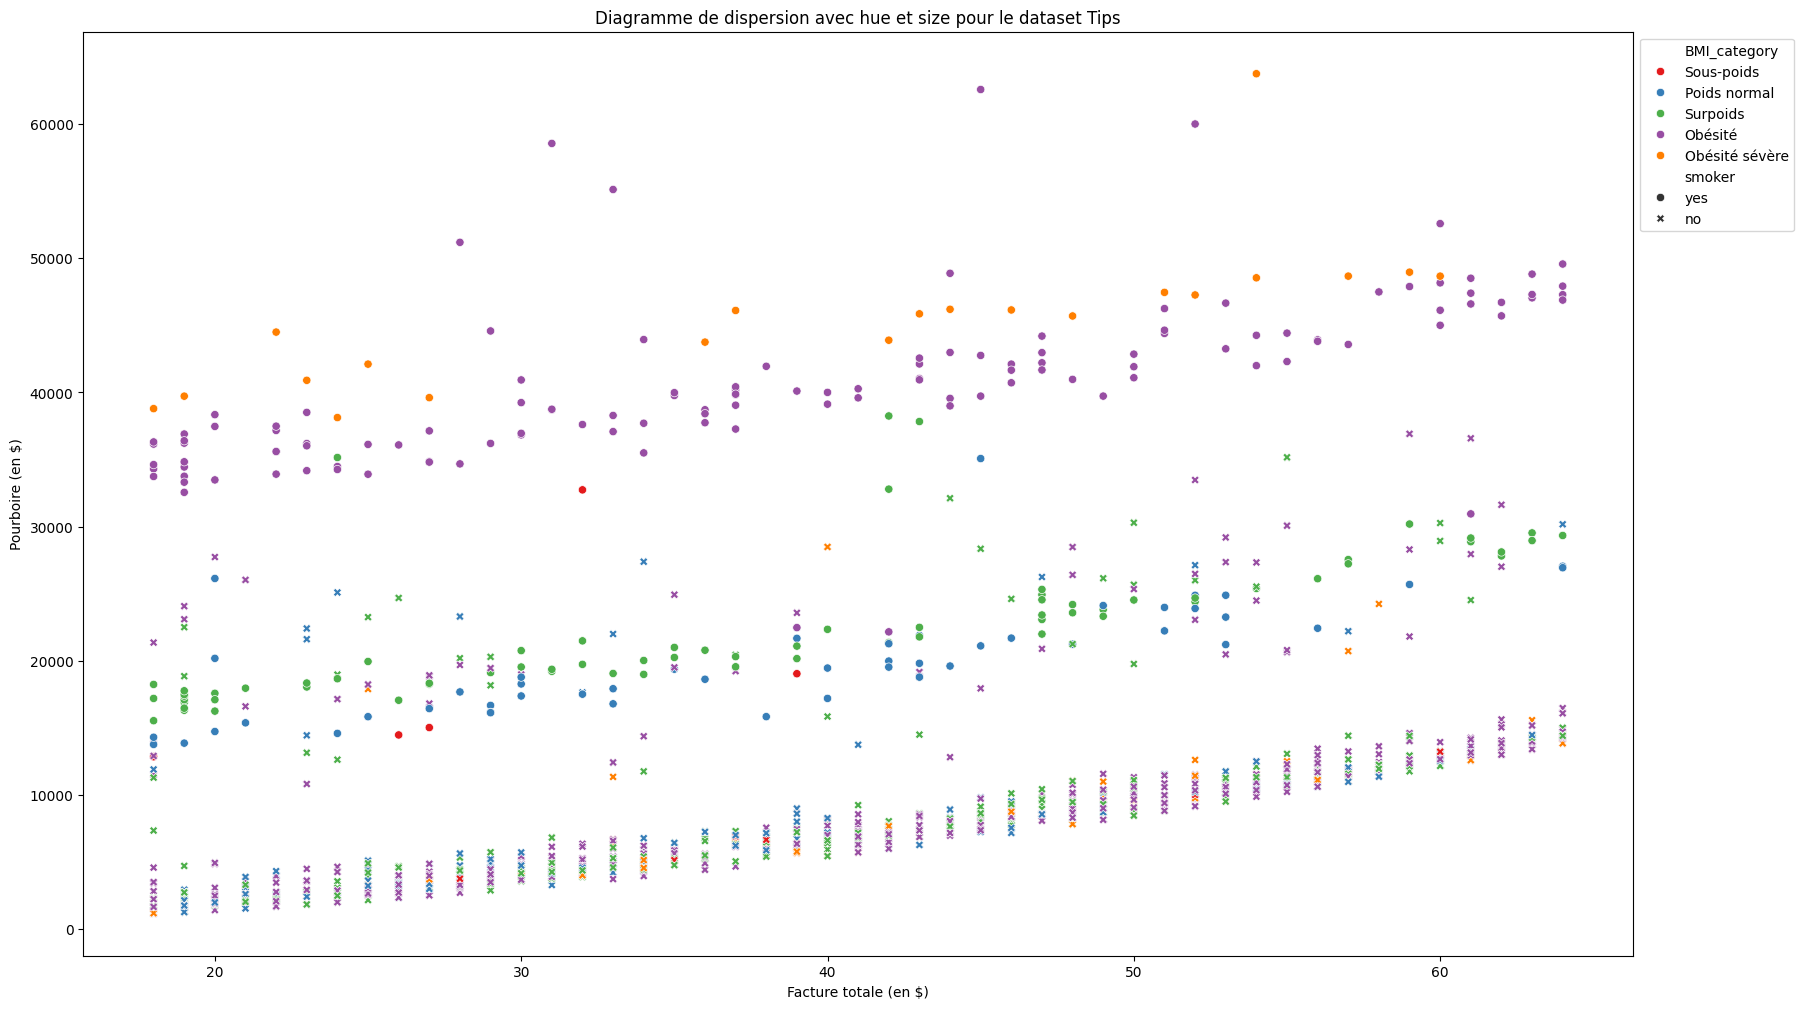

In [46]:
# Diagramme de dispersion avec teinte (hue) et taille (size)
plt.figure(figsize=(20, 12))
sns.scatterplot(
    x="age", 
    y="charges", 
    data=df, 
    hue="BMI_category",        # Couleur par jour (catégoriel)
    style = 'smoker',
    # size="size",      # Varier la taille du marqueur par colonne de taille (numérique)
    sizes=(20, 200),  # Définir la taille des marqueurs
    palette="Set1"    # Palette de couleurs
)
plt.title("Diagramme de dispersion avec hue et size pour le dataset Tips")
plt.xlabel("Facture totale (en $)")
plt.ylabel("Pourboire (en $)")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [47]:
#Label encoder pour le sexe et si les usagers sont fumeurs

labe_encod = LabelEncoder()
df['sex_encode']= labe_encod.fit_transform(df['sex'])
df['smoker_encode']= labe_encod.fit_transform(df['smoker'])
df

,index,age,sex,bmi,children,smoker,region,charges,BMI_category,age_categories,sex_encode,smoker_encode
0,0,19,female,27.900,0,yes,southwest,16884.92400,Surpoids,18-35,0,1
1,1,18,male,33.770,1,no,southeast,1725.55230,Obésité,18-35,1,0
2,2,28,male,33.000,3,no,southeast,4449.46200,Obésité,18-35,1,0
3,3,33,male,22.705,0,no,northwest,21984.47061,Poids normal,18-35,1,0
4,4,32,male,28.880,0,no,northwest,3866.85520,Surpoids,18-35,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1333,50,male,30.970,3,no,northwest,10600.54830,Obésité,46-55,1,0
1333,1334,18,female,31.920,0,no,northeast,2205.98080,Obésité,18-35,0,0
1334,1335,18,female,36.850,0,no,southeast,1629.83350,Obésité,18-35,0,0
1335,1336,21,female,25.800,0,no,southwest,2007.94500,Surpoids,18-35,0,0


In [48]:
# encodage par région et par bmi category

df_reg_encod = pd.get_dummies(df['region'])
df_reg_encod.replace(False, 0, inplace=True)
df_reg_encod.replace(True, 1, inplace=True)
df_reg_encod

df_bmi_encod = pd.get_dummies(df['BMI_category'])
df_bmi_encod.replace(False, 0, inplace=True)
df_bmi_encod.replace(True, 1, inplace=True)
df_bmi_encod

/tmp/ipykernel_10600/2260671963.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_reg_encod.replace(True, 1, inplace=True)
/tmp/ipykernel_10600/2260671963.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmi_encod.replace(True, 1, inplace=True)


,Sous-poids,Poids normal,Surpoids,Obésité,Obésité sévère
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
1332,0,0,0,1,0
1333,0,0,0,1,0
1334,0,0,0,1,0
1335,0,0,1,0,0


In [49]:
#concatener les df encodé avec le df

df_2 = pd.concat([df,df_reg_encod,df_bmi_encod], axis=1)
df_2

,index,age,sex,bmi,children,smoker,region,charges,BMI_category,age_categories,...,smoker_encode,northeast,northwest,southeast,southwest,Sous-poids,Poids normal,Surpoids,Obésité,Obésité sévère
0,0,19,female,27.900,0,yes,southwest,16884.92400,Surpoids,18-35,...,1,0,0,0,1,0,0,1,0,0
1,1,18,male,33.770,1,no,southeast,1725.55230,Obésité,18-35,...,0,0,0,1,0,0,0,0,1,0
2,2,28,male,33.000,3,no,southeast,4449.46200,Obésité,18-35,...,0,0,0,1,0,0,0,0,1,0
3,3,33,male,22.705,0,no,northwest,21984.47061,Poids normal,18-35,...,0,0,1,0,0,0,1,0,0,0
4,4,32,male,28.880,0,no,northwest,3866.85520,Surpoids,18-35,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1333,50,male,30.970,3,no,northwest,10600.54830,Obésité,46-55,...,0,0,1,0,0,0,0,0,1,0
1333,1334,18,female,31.920,0,no,northeast,2205.98080,Obésité,18-35,...,0,1,0,0,0,0,0,0,1,0
1334,1335,18,female,36.850,0,no,southeast,1629.83350,Obésité,18-35,...,0,0,0,1,0,0,0,0,1,0
1335,1336,21,female,25.800,0,no,southwest,2007.94500,Surpoids,18-35,...,0,0,0,0,1,0,0,1,0,0


In [50]:
#supprimer les colonnes qui ont été encodés

df_2.drop(columns=['sex','smoker','region','BMI_category','age_categories'],inplace=True)
df_2

,index,age,bmi,children,charges,sex_encode,smoker_encode,northeast,northwest,southeast,southwest,Sous-poids,Poids normal,Surpoids,Obésité,Obésité sévère
0,0,19,27.900,0,16884.92400,0,1,0,0,0,1,0,0,1,0,0
1,1,18,33.770,1,1725.55230,1,0,0,0,1,0,0,0,0,1,0
2,2,28,33.000,3,4449.46200,1,0,0,0,1,0,0,0,0,1,0
3,3,33,22.705,0,21984.47061,1,0,0,1,0,0,0,1,0,0,0
4,4,32,28.880,0,3866.85520,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1333,50,30.970,3,10600.54830,1,0,0,1,0,0,0,0,0,1,0
1333,1334,18,31.920,0,2205.98080,0,0,1,0,0,0,0,0,0,1,0
1334,1335,18,36.850,0,1629.83350,0,0,0,0,1,0,0,0,0,1,0
1335,1336,21,25.800,0,2007.94500,0,0,0,0,0,1,0,0,1,0,0


In [51]:
df_corr = df_2.corr()

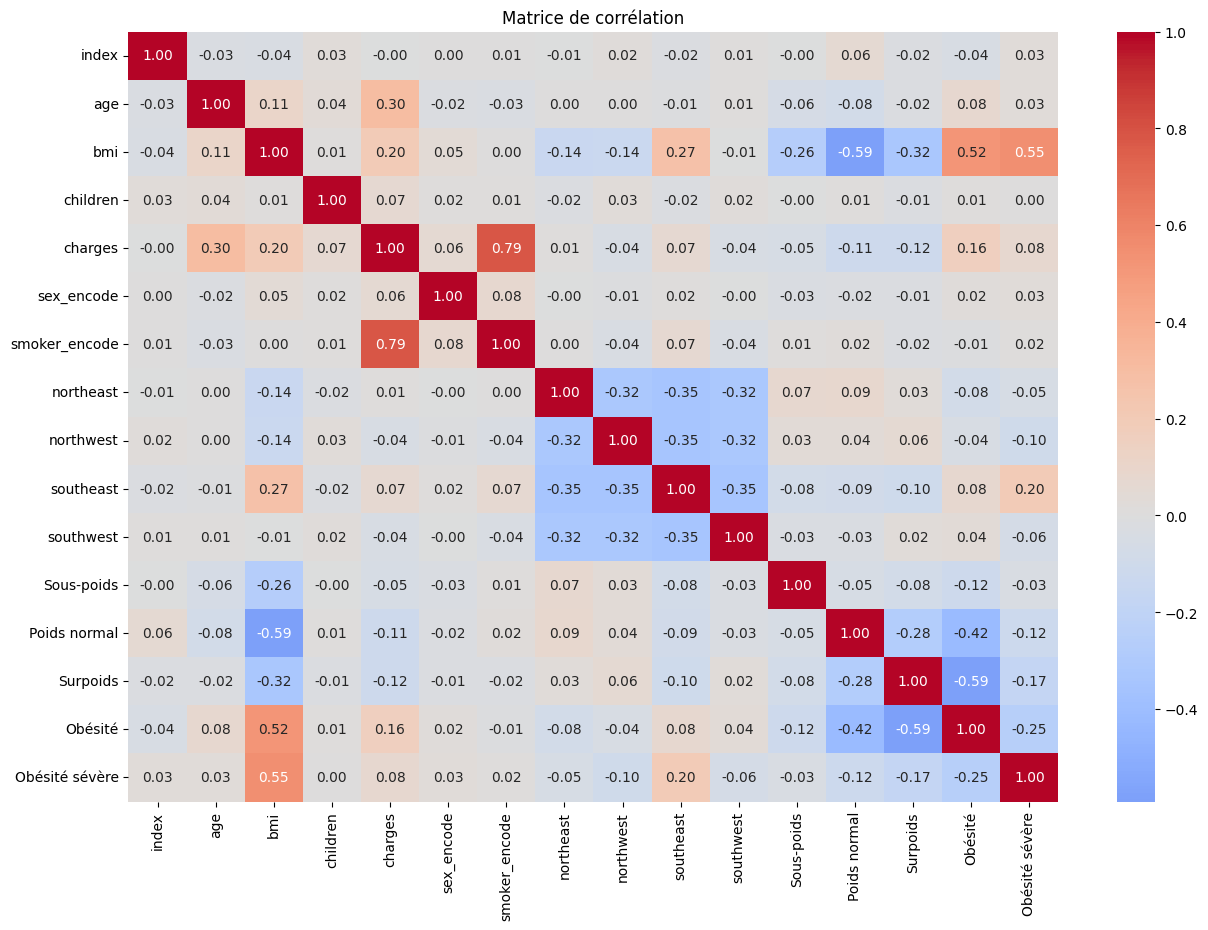

In [86]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr,center = 0, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation")
plt.show()

In [53]:
from scipy.stats import spearmanr, pearsonr

# il y a une tres forte corrélation entre le fait l'IMC et le montant de la redevance


r, p_value = spearmanr(df['bmi'], df['charges'])

print(f"Coefficient de corrélation de Spearman: {r}")
print(f"P-valeur: {p_value}")


Coefficient de corrélation de Spearman: 0.11958495819244366
P-valeur: 1.1637179203181515e-05


In [54]:
#il y a une tres forte corrélation entre le montant de charge entre les fumeurs et non fumeurs

r, p_value = pearsonr(df['smoker_encode'], df['charges'])

print(f"Coefficient de corrélation de Pearson: {r}")
print(f"P-valeur: {p_value}")

Coefficient de corrélation de Pearson: 0.7872343672800317
P-valeur: 1.4067220949377421e-282


In [55]:
#lien entre le fait d'être fumeur et le sexe

r, p_value = pearsonr( df_2['smoker_encode'], df_2['sex_encode'])

print(f"Coefficient de corrélation de Pearson: {r}")
print(f"P-valeur: {p_value}")

Coefficient de corrélation de Pearson: 0.07659585039335855
P-valeur: 0.00507513231566706


In [56]:
df_2

,index,age,bmi,children,charges,sex_encode,smoker_encode,northeast,northwest,southeast,southwest,Sous-poids,Poids normal,Surpoids,Obésité,Obésité sévère
0,0,19,27.900,0,16884.92400,0,1,0,0,0,1,0,0,1,0,0
1,1,18,33.770,1,1725.55230,1,0,0,0,1,0,0,0,0,1,0
2,2,28,33.000,3,4449.46200,1,0,0,0,1,0,0,0,0,1,0
3,3,33,22.705,0,21984.47061,1,0,0,1,0,0,0,1,0,0,0
4,4,32,28.880,0,3866.85520,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1333,50,30.970,3,10600.54830,1,0,0,1,0,0,0,0,0,1,0
1333,1334,18,31.920,0,2205.98080,0,0,1,0,0,0,0,0,0,1,0
1334,1335,18,36.850,0,1629.83350,0,0,0,0,1,0,0,0,0,1,0
1335,1336,21,25.800,0,2007.94500,0,0,0,0,0,1,0,0,1,0,0


In [57]:
# toutes les variables print en rouge ont un p-value inférieur à 0,05

for i in range(len(df_2.columns)):
    r,p_value = pearsonr(df_2['charges'], df_2[str(df_2.columns[i])])
    if p_value < 0.05:
        print(f"\033[31mCoefficient de corrélation de Pearson entre la charge et la variable {df_2.columns[i]}: {r}")
        print(f"\033[31mP-valeur: {p_value}\033[0m ")
        print('=======================================')
        print('')
    else:
        print(f"Coefficient de corrélation de Pearson entre la charge et la variable {df_2.columns[i]}: {r}")
        print(f"P-valeur: {p_value}")
        print('=======================================')
        print('')

Coefficient de corrélation de Pearson entre la charge et la variable index: -0.003536711673635449
P-valeur: 0.8971999129654007

Coefficient de corrélation de Pearson entre la charge et la variable age: 0.29830821250978645
P-valeur: 6.975748762691051e-29 

Coefficient de corrélation de Pearson entre la charge et la variable bmi: 0.19840083122624935
P-valeur: 2.4680404264513685e-13 

Coefficient de corrélation de Pearson entre la charge et la variable children: 0.06738935083963249
P-valeur: 0.013717026292987116 

Coefficient de corrélation de Pearson entre la charge et la variable charges: 1.0
P-valeur: 0.0 

Coefficient de corrélation de Pearson entre la charge et la variable sex_encode: 0.05804449579031286
P-valeur: 0.03382079199512013 

Coefficient de corrélation de Pearson entre la charge et la variable smoker_encode: 0.7872343672800317
P-valeur: 1.4067220949377421e-282 

Coefficient de corrélation de Pearson entre la charge et la variable northeast: 0.005945323272979339
P-valeur: 0.

In [58]:
# toutes les variables print en rouge ont un p-value inférieur à 0,05

for i in range(len(df_2.columns)):
    r,p_value = spearmanr(df_2['charges'], df_2[str(df_2.columns[i])])
    if p_value < 0.05:
        print(f"\033[31mCoefficient de corrélation de spearman entre la charge et la variable {df_2.columns[i]}: {r}")
        print(f"\033[31mP-valeur: {p_value}\033[0m ")
        print('=======================================')
        print('')
    else:
        print(f"Coefficient de corrélation de Spearman entre la charge et la variable {df_2.columns[i]}: {r}")
        print(f"P-valeur: {p_value}")
        print('=======================================')
        print('')

Coefficient de corrélation de Spearman entre la charge et la variable index: 0.00013604809056986898
P-valeur: 0.9960345723474383

Coefficient de corrélation de spearman entre la charge et la variable age: 0.5335232787189862
P-valeur: 3.187755650322475e-99 

Coefficient de corrélation de spearman entre la charge et la variable bmi: 0.11958495819244366
P-valeur: 1.1637179203181515e-05 

Coefficient de corrélation de spearman entre la charge et la variable children: 0.13220013322835855
P-valeur: 1.2303764274728683e-06 

Coefficient de corrélation de spearman entre la charge et la variable charges: 1.0
P-valeur: 0.0 

Coefficient de corrélation de Spearman entre la charge et la variable sex_encode: 0.010748016529808158
P-valeur: 0.6945816298552255

Coefficient de corrélation de spearman entre la charge et la variable smoker_encode: 0.6636108038390024
P-valeur: 1.721413120569575e-170 

Coefficient de corrélation de Spearman entre la charge et la variable northeast: 0.045433404697291645
P-va

In [59]:
df

,index,age,sex,bmi,children,smoker,region,charges,BMI_category,age_categories,sex_encode,smoker_encode
0,0,19,female,27.900,0,yes,southwest,16884.92400,Surpoids,18-35,0,1
1,1,18,male,33.770,1,no,southeast,1725.55230,Obésité,18-35,1,0
2,2,28,male,33.000,3,no,southeast,4449.46200,Obésité,18-35,1,0
3,3,33,male,22.705,0,no,northwest,21984.47061,Poids normal,18-35,1,0
4,4,32,male,28.880,0,no,northwest,3866.85520,Surpoids,18-35,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1333,50,male,30.970,3,no,northwest,10600.54830,Obésité,46-55,1,0
1333,1334,18,female,31.920,0,no,northeast,2205.98080,Obésité,18-35,0,0
1334,1335,18,female,36.850,0,no,southeast,1629.83350,Obésité,18-35,0,0
1335,1336,21,female,25.800,0,no,southwest,2007.94500,Surpoids,18-35,0,0


In [60]:
df.BMI_category.unique()

['Surpoids', 'Obésité', 'Poids normal', 'Obésité sévère', 'Sous-poids']
Categories (5, object): ['Sous-poids' < 'Poids normal' < 'Surpoids' < 'Obésité' < 'Obésité sévère']

In [61]:
df_surpoids = df.loc[df['BMI_category'] == 'Surpoids', 'charges']
df_obesite = df.loc[df['BMI_category'] == 'Obésité', 'charges']
df_norm = df.loc[df['BMI_category'] == 'Poids normal', 'charges']
df_os = df.loc[df['BMI_category'] == 'Obésité sévère', 'charges']
df_sp = df.loc[df['BMI_category'] == 'Sous-poids', 'charges']


In [62]:

from scipy.stats import f_oneway

stat_anova, p_value = f_oneway(df_surpoids,df_obesite,df_norm,df_os,df_sp)
print(stat_anova)
print(p_value)

13.841747683345307
4.580824673568124e-11


Hypothèse nulle : est qu'il y a pas différences entre les groupes
hypothèse alternative est qu'au moins un groupe est différent

In [63]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### YOUR CODE HERE ### 

tukey_oneway = pairwise_tukeyhsd(endog = df["charges"], groups = df["BMI_category"])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Obésité,Obésité sévère,1494.2529,0.7956,-2147.2125,5135.7182,False
Obésité,Poids normal,-4910.863,0.0,-7446.0618,-2375.6642,True
Obésité,Sous-poids,-6438.1621,0.12,-13811.6302,935.306,False
Obésité,Surpoids,-4260.031,0.0,-6375.6178,-2144.4442,True
Obésité sévère,Poids normal,-6405.1158,0.0002,-10445.6931,-2364.5385,True
Obésité sévère,Sous-poids,-7932.415,0.0541,-15949.089,84.2591,False
Obésité sévère,Surpoids,-5754.2838,0.0003,-9545.6872,-1962.8805,True
Poids normal,Sous-poids,-1527.2991,0.9819,-9105.8231,6051.2248,False
Poids normal,Surpoids,650.832,0.9672,-2095.384,3397.0479,False
Sous-poids,Surpoids,2178.1311,0.931,-5270.5265,9626.7887,False


Obésité vs Poids normal : La différence de moyenne est de -4910,86, avec une valeur p de 0,0. Cela indique une différence significative entre ces deux groupes (on rejette l'hypothèse nulle).
Obésité vs Surpoids : La différence de moyenne est de -4260,03, avec une valeur p de 0,0, ce qui indique également une différence significative (on rejette l'hypothèse nulle).
Obésité sévère vs Poids normal : La différence de moyenne est de -6405,12, avec une valeur p de 0,0002, ce qui montre une différence significative (on rejette l'hypothèse nulle).
Poids normal vs Sous-poids : La différence de moyenne est de -1527,30, avec une valeur p de 0,9819, ce qui indique qu'il n'y a pas de différence significative (on ne rejette pas l'hypothèse nulle).
En général, une valeur p inférieure à 0,05 suggère qu'il existe une différence statistiquement significative entre les groupes, comme on peut le voir dans plusieurs des comparaisons dans ce tableau.

In [64]:
df[(df['BMI_category'] == "Sous-poids") & (df['smoker']=='yes')]

,index,age,sex,bmi,children,smoker,region,charges,BMI_category,age_categories,sex_encode,smoker_encode
128,128,32,female,17.765,2,yes,northwest,32734.18630,Sous-poids,18-35,0,1
250,250,18,male,17.290,2,yes,northeast,12829.45510,Sous-poids,18-35,1,1
380,380,27,female,17.955,2,yes,northeast,15006.57945,Sous-poids,18-35,0,1
412,412,26,female,17.195,2,yes,northeast,14455.64405,Sous-poids,18-35,0,1
1084,1085,39,female,18.300,5,yes,southwest,19023.26000,Sous-poids,36-45,0,1


In [65]:
df.groupby('BMI_category')['smoker'].value_counts()

/tmp/ipykernel_10600/2399870850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('BMI_category')['smoker'].value_counts()


BMI_category    smoker
Sous-poids      no         15
                yes         5
Poids normal    no        172
                yes        50
Surpoids        no        305
                yes        72
Obésité         no        501
                yes       126
Obésité sévère  no         70
                yes        21
Name: count, dtype: int64

In [66]:
df[['BMI_category','smoker']].value_counts()

BMI_category    smoker
Obésité         no        501
Surpoids        no        305
Poids normal    no        172
Obésité         yes       126
Surpoids        yes        72
Obésité sévère  no         70
Poids normal    yes        50
Obésité sévère  yes        21
Sous-poids      no         15
                yes         5
Name: count, dtype: int64

In [67]:
tukey_oneway = pairwise_tukeyhsd(endog = df["charges"], groups = df["smoker"])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
no,yes,23609.5715,0.0,22616.6225,24602.5205,True


In [68]:
df_fumeurs = df.loc[df['smoker'] == 'yes', 'charges']
df_nom_fumeurs = df.loc[df['smoker'] == 'no', 'charges']


stat_anova, p_value = f_oneway(df_fumeurs,df_nom_fumeurs)
print(stat_anova)
print(p_value)

2175.7368631272116
1.4067220949358597e-282


In [69]:
df

,index,age,sex,bmi,children,smoker,region,charges,BMI_category,age_categories,sex_encode,smoker_encode
0,0,19,female,27.900,0,yes,southwest,16884.92400,Surpoids,18-35,0,1
1,1,18,male,33.770,1,no,southeast,1725.55230,Obésité,18-35,1,0
2,2,28,male,33.000,3,no,southeast,4449.46200,Obésité,18-35,1,0
3,3,33,male,22.705,0,no,northwest,21984.47061,Poids normal,18-35,1,0
4,4,32,male,28.880,0,no,northwest,3866.85520,Surpoids,18-35,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1333,50,male,30.970,3,no,northwest,10600.54830,Obésité,46-55,1,0
1333,1334,18,female,31.920,0,no,northeast,2205.98080,Obésité,18-35,0,0
1334,1335,18,female,36.850,0,no,southeast,1629.83350,Obésité,18-35,0,0
1335,1336,21,female,25.800,0,no,southwest,2007.94500,Surpoids,18-35,0,0


In [91]:
df_18_35 = df.loc[df['age_categories'] == '18-35', 'charges']
df_36_45 = df.loc[df['age_categories'] == '36-45', 'charges']
df_46_55 = df.loc[df['age_categories'] == '46-55', 'charges']
df_plus55 = df.loc[df['age_categories'] == 'plus de 55 ans', 'charges']
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
18-35,36-45,3569.906,0.0005,1252.5148,5887.2971,True
18-35,46-55,6095.3049,0.0,3931.9096,8258.7001,True
18-35,plus de 55 ans,8754.6532,0.0,6461.1534,11048.1531,True
36-45,46-55,2525.3989,0.0654,-106.4762,5157.274,False
36-45,plus de 55 ans,5184.7473,0.0,2444.9244,7924.5701,True
46-55,plus de 55 ans,2659.3483,0.044,48.4852,5270.2115,True


In [92]:
from scipy.stats import f_oneway

stat_anova, p_value = f_oneway(df_18_35,df_36_45,df_46_55,df_plus55)
print(stat_anova)
print(p_value)

38.53000645660771
7.053706263876266e-24


In [70]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### YOUR CODE HERE ### 

tukey_oneway = pairwise_tukeyhsd(endog = df["charges"], groups = df["age_categories"])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
18-35,36-45,3569.906,0.0005,1252.5148,5887.2971,True
18-35,46-55,6095.3049,0.0,3931.9096,8258.7001,True
18-35,plus de 55 ans,8754.6532,0.0,6461.1534,11048.1531,True
36-45,46-55,2525.3989,0.0654,-106.4762,5157.274,False
36-45,plus de 55 ans,5184.7473,0.0,2444.9244,7924.5701,True
46-55,plus de 55 ans,2659.3483,0.044,48.4852,5270.2115,True


## on remarque la tranche 18-35 ans est True contre chaque groupe